In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv("./data/SanFrancisco_Housing_Data/final_data.csv")

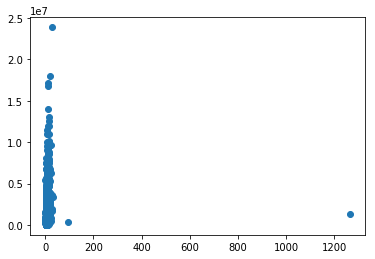

In [3]:
x = housing['totalrooms']
y = housing['lastsoldprice']
plt.scatter(x,y)
plt.show()

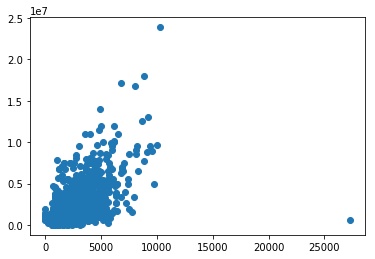

In [4]:
x = housing['finishedsqft']
y = housing['lastsoldprice']
plt.scatter(x,y)
plt.show()

In [5]:
housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,11330.0,9.171729e+03,4.921941e+03,2.000000e+00,5.039750e+03,9.198500e+03,1.337475e+04,1.763200e+04
bathrooms,11330.0,1.980229e+00,1.047358e+00,5.000000e-01,1.000000e+00,2.000000e+00,2.000000e+00,1.400000e+01
bedrooms,11330.0,2.614475e+00,1.299457e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01
finishedsqft,11330.0,1.585421e+03,9.219782e+02,1.000000e+00,1.019000e+03,1.362000e+03,1.876000e+03,2.727500e+04
lastsoldprice,11330.0,1.263928e+06,1.042079e+06,5.350000e+02,7.292500e+05,9.900000e+05,1.450000e+06,2.388900e+07
latitude,11330.0,3.775971e+01,2.557802e-02,3.770817e+01,3.773929e+01,3.776051e+01,3.778139e+01,3.780608e+01
longitude,11330.0,-1.224365e+02,3.074340e-02,-1.225107e+02,-1.224552e+02,-1.224325e+02,-1.224134e+02,-1.223812e+02
totalrooms,11330.0,6.111562e+00,1.212582e+01,1.000000e+00,4.000000e+00,5.000000e+00,7.000000e+00,1.264000e+03
yearbuilt,11330.0,1.948498e+03,3.791120e+01,1.860000e+03,1.916000e+03,1.940000e+03,1.986000e+03,2.016000e+03
zestimate,11330.0,1.565695e+06,1.229417e+06,4.323850e+05,9.052375e+05,1.230758e+06,1.731170e+06,1.553325e+07


In [6]:
housing.shape

(11330, 19)

In [7]:
housing['totalrooms'].sort_values(ascending=False)[:5]

8967     1264.0
8300       94.0
11175      33.0
10727      28.0
2750       28.0
Name: totalrooms, dtype: float64

In [8]:
sorted(housing['totalrooms'], reverse=True)[:5]

[1264.0, 94.0, 33.0, 28.0, 28.0]

In [9]:
housing_original = pd.DataFrame(housing)

In [10]:
housing.describe()

,Unnamed: 0,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zestimate,zipcode,zpid
count,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,1.133000e+04
mean,9171.729214,1.980229,2.614475,1585.420918,1.263928e+06,37.759711,-122.436518,6.111562,1948.498147,1.565695e+06,94116.912004,3.689973e+07
std,4921.941074,1.047358,1.299457,921.978245,1.042079e+06,0.025578,0.030743,12.125819,37.911196,1.229417e+06,9.400877,7.800741e+07
min,2.000000,0.500000,0.000000,1.000000,5.350000e+02,37.708170,-122.510726,1.000000,1860.000000,4.323850e+05,94102.000000,1.506329e+07
25%,5039.750000,1.000000,2.000000,1019.000000,7.292500e+05,37.739286,-122.455157,4.000000,1916.000000,9.052375e+05,94110.000000,1.510847e+07
50%,9198.500000,2.000000,2.000000,1362.000000,9.900000e+05,37.760513,-122.432510,5.000000,1940.000000,1.230758e+06,94115.000000,1.515697e+07
75%,13374.750000,2.000000,3.000000,1876.000000,1.450000e+06,37.781386,-122.413359,7.000000,1986.000000,1.731170e+06,94123.000000,5.970040e+07
max,17632.000000,14.000000,20.000000,27275.000000,2.388900e+07,37.806083,-122.381201,1264.000000,2016.000000,1.553325e+07,94158.000000,2.146999e+09


In [11]:
housing = housing.query('not (bedrooms < 3 and totalrooms > 14)').query('not (bedrooms < 3 and finishedsqft > 10000)')

In [12]:
housing.shape

(11314, 19)

In [13]:
housing['lastsolddateint'] = pd.to_datetime(housing['lastsolddate'], format='%m/%d/%Y').astype('int64')
housing['lastsolddateint'] = housing['lastsolddateint']/1000000000
housing = housing[housing['lastsolddateint'].notnull()]

In [14]:
clean_data = housing.copy()

In [15]:
def drop_geog(data, keep = []):     
    remove_list = ['info','address','z_address','longitude','latitude','neighborhood','lastsolddate','zipcode','zpid','usecode', 'zestimate','zindexvalue']
    for k in keep:
        remove_list.remove(k)
    data = data.drop(remove_list, axis=1)
    data = data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1)
    return data  


In [16]:
housing = drop_geog(housing)

In [17]:
from sklearn.model_selection import train_test_split

def split_data(data):
    y = data['lastsoldprice']
    X = data.drop('lastsoldprice', axis=1)
    # Return (X_train, X_test, y_train, y_test)
    return train_test_split(X, y, test_size=0.2, random_state=30)


In [18]:
housing_split = split_data(housing)

In [19]:
import sys
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np

from sklearn.linear_model import LinearRegression

def train_eval(algorithm, grid_params, X_train, X_test, y_train, y_test):
    regression_model = GridSearchCV(algorithm, grid_params, cv=5, n_jobs=-1, verbose=1)
    regression_model.fit(X_train, y_train)
    y_pred = regression_model.predict(X_test)
    print("R2: \t", r2_score(y_test, y_pred))
    print("RMSE: \t", sqrt(mean_squared_error(y_test, y_pred)))
    print("MAE: \t", mean_absolute_error(y_test, y_pred))
    return regression_model
    
train_eval(LinearRegression(), {}, *housing_split)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.7s finished


R2: 	 0.4756395296594721
RMSE: 	 695040.9761008522
MAE: 	 414407.652226099


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=-1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [20]:
from sklearn.neighbors import KNeighborsRegressor
knn_params = {'n_neighbors' : [1, 5, 10, 20, 30, 50, 75, 100, 200, 500]}
model = train_eval(KNeighborsRegressor(), knn_params, *housing_split)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.2s


R2: 	 0.1380257286237786
RMSE: 	 891133.1270669803
MAE: 	 500181.70879363676


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   15.0s finished


In [21]:
from sklearn.tree import DecisionTreeRegressor

tree_params = {}
train_eval(DecisionTreeRegressor(), tree_params, *housing_split)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


R2: 	 0.16702605212154042
RMSE: 	 876014.2004825856
MAE: 	 452247.2266902342


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [22]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

forest_params = {'n_estimators': [1000], 'max_depth': [None], 'min_samples_split': [2]}
forest = train_eval(RandomForestRegressor(), forest_params, *housing_split)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.1min finished


R2: 	 0.5607839323541752
RMSE: 	 636113.4034777491
MAE: 	 342330.79237731197


In [23]:
housing_cleaned = drop_geog(clean_data.copy(), ['neighborhood'])

In [24]:
one_hot = pd.get_dummies(housing_cleaned["neighborhood"])

In [25]:
housing_cleaned= housing_cleaned.drop("neighborhood", axis=1)

In [26]:
(X_train, X_test, y_train, y_test) = split_data(housing_cleaned)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train[X_train.columns] = scaler.transform(X_train[X_train.columns])
X_train = X_train.join(one_hot)
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
X_test = X_test.join(one_hot)

housing_split_cleaned = (X_train, X_test, y_train, y_test)

In [28]:
model = train_eval(LinearRegression(), {}, *housing_split_cleaned)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.9s finished


R2: 	 0.606635425696034
RMSE: 	 601995.2434354728
MAE: 	 352192.45956694655


In [29]:
model = train_eval(KNeighborsRegressor(), knn_params, *housing_split_cleaned)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.5min finished


R2: 	 0.6863513532533669
RMSE: 	 537547.8708543794
MAE: 	 281630.69867432606


In [30]:
model = train_eval(DecisionTreeRegressor(), tree_params,*housing_split_cleaned)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


R2: 	 0.4930646018855106
RMSE: 	 683394.9197595846
MAE: 	 346025.1038444543


In [31]:
model = train_eval(RandomForestRegressor(), forest_params, *housing_split_cleaned)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  8.3min finished


MemoryError: could not allocate 786432 bytes